# plot the brain picks for sequence comparison

In [77]:
import matplotlib.pyplot as plt
import nilearn.plotting as niplt # for debugging
import nilearn.image as img
import pandas as pd
import nibabel as nib
import os
import numpy as np

# Fig xxx: main effect of response hand

## plot of hand contrast for each TR for example subject

In [78]:
def plotT(t, bg, sub, TR, contrast, coords, maxval, pname, dispmode, axes=None):
    stats = t % (sub, TR, contrast)
    T1 = bg % (sub, sub)
    disp = niplt.plot_stat_map(stat_map_img=stats, 
                               bg_img=T1, 
                               cut_coords=coords, 
                               colorbar=True, 
                               axes=axes,
                               annotate=True,
                               symmetric_cbar=True,
                               draw_cross=False,
                               black_bg=True,
                               vmax = maxval,
                               display_mode = dispmode,
                               cmap = "coolwarm") 
    return disp

In [79]:
sub = '04'
TR = '700'
c = '1'
bg_tmp = '/scratch/qbi/uqkgarn1/STRIWP1/derivatives/glm/sub-%s/anat/sub-%s_desc-masked_T1w.nii.gz'
t_tmp = '/scratch/qbi/uqkgarn1/STRIWP1/derivatives/glmTDFAST_HANDS/sub-%s/TR%s/THRSH/spmF_000%s_thresh.nii.gz'

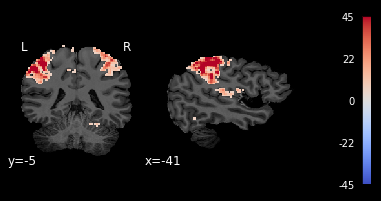

In [80]:
plotT(t_tmp, bg_tmp, sub, TR, c, None, 45, "ME", 'yx') #[-42, -7, 26]

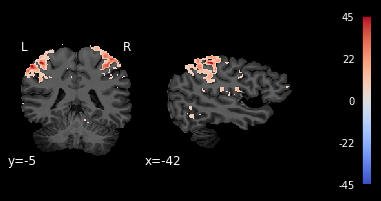

In [81]:
plotT(t_tmp, bg_tmp, sub, '1510', c, [-42, -5], 45, "CMRR", 'yx')

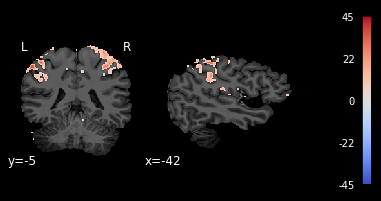

In [82]:
plotT(t_tmp, bg_tmp, sub, '1920', c, [-42, -5], 45, "3D EPI", 'yx')

### make into one mega plot

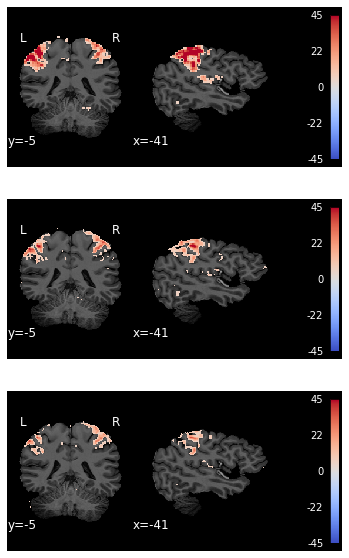

In [83]:
nrow =3
ncol = 1
figsz = [6, 10]
fa, (ax1, ax2, ax3) = plt.subplots(nrow, ncol, figsize=figsz)
plotT(t_tmp, bg_tmp, sub, '700', c, [-41, -5], 45, "ME", 'yx', axes=ax1)
plotT(t_tmp, bg_tmp, sub, '1510', c, [-41, -5], 45, "CMRR", 'yx', axes=ax2)
plotT(t_tmp, bg_tmp, sub, '1920', c, [-41,-5], 45, "3D EPI", 'yx', axes=ax3)

### save

In [84]:
savename = '/scratch/qbi/uqkgarn1/STRIWP1/derivatives/glmTDFAST_HANDS/sub-%s_tS.pdf' % '04'
fa.savefig(fname = savename, facecolor='w', edgecolor='w')

## ME tgt laterality

In [85]:
nrow = 3
ncol = 1
figsz = [6, 10]
t_tmp = '/scratch/qbi/uqkgarn1/STRIWP1/derivatives/glmTDFAST_TC/sub-%s/TR%s/THRSH/spmF_000%s_thresh.nii.gz'
c = 1

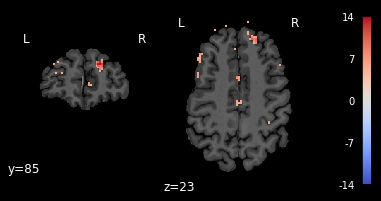

In [86]:
plotT(t_tmp, bg_tmp, sub, '700', c, [85, 23], 14, "ME", 'yz') #[-42, -7, 26]

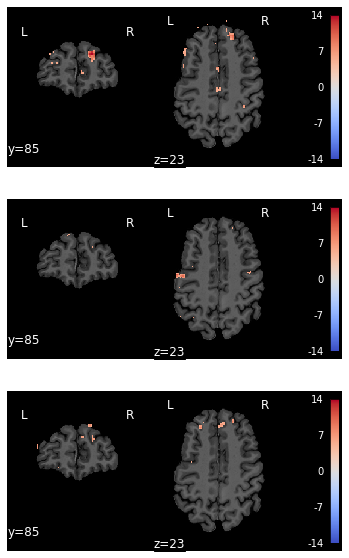

In [87]:
fb, (ax1, ax2, ax3) = plt.subplots(nrow, ncol, figsize=figsz)
plotT(t_tmp, bg_tmp, sub, '700', c, [85, 23], 14, "ME", 'yz', axes=ax1)
plotT(t_tmp, bg_tmp, sub, '1510', c, [85, 23], 14, "CMRR", 'yz', axes=ax2)
plotT(t_tmp, bg_tmp, sub, '1920', c, [85, 23], 14, "3D EPI", 'yz', axes=ax3)

In [88]:
savename = '/scratch/qbi/uqkgarn1/STRIWP1/derivatives/glmTDFAST_TC/sub-%s_TC_lat.pdf' % '04'
fb.savefig(fname = savename, facecolor='w', edgecolor='w')

# ME cue

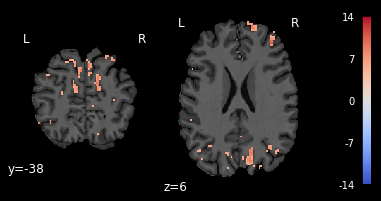

In [89]:
plotT(t_tmp, bg_tmp, sub, '700', 2, None, 14, "ME", 'yz') 

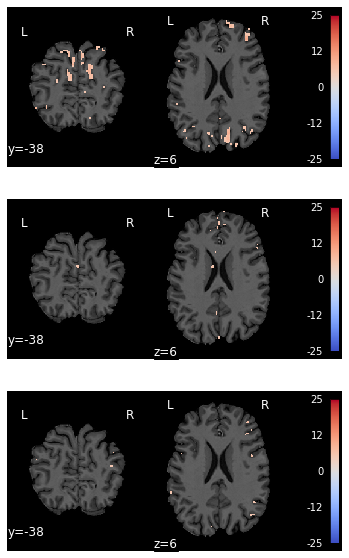

In [90]:
c = 2
fc, (ax1, ax2, ax3) = plt.subplots(nrow, ncol, figsize=figsz)
plotT(t_tmp, bg_tmp, sub, '700', c, [-38, 6], 25, "ME", 'yz', axes=ax1)
plotT(t_tmp, bg_tmp, sub, '1510', c, [-38, 6], 25, "CMRR", 'yz', axes=ax2)
plotT(t_tmp, bg_tmp, sub, '1920', c, [-38, 6], 25, "3D EPI", 'yz', axes=ax3)

In [91]:
savename = '/scratch/qbi/uqkgarn1/STRIWP1/derivatives/glmTDFAST_TC/sub-%s_TC_cert.pdf' % '04'
fc.savefig(fname = savename, facecolor='w', edgecolor='w')

### tgt x cue interaction

In [92]:
c = 3

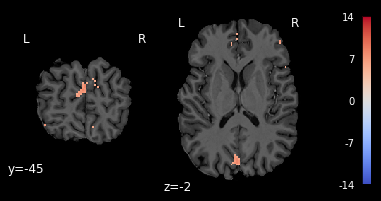

In [93]:
plotT(t_tmp, bg_tmp, sub, '700', c, None, 14, "ME", 'yz') 

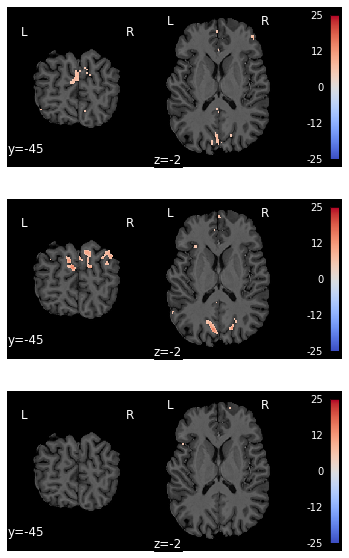

In [94]:
fd, (ax1, ax2, ax3) = plt.subplots(nrow, ncol, figsize=figsz)
plotT(t_tmp, bg_tmp, sub, '700', c, [-45, -2], 25, "ME", 'yz', axes=ax1)
plotT(t_tmp, bg_tmp, sub, '1510', c, [-45, -2], 25, "CMRR", 'yz', axes=ax2)
plotT(t_tmp, bg_tmp, sub, '1920', c, [-45, -2], 25, "3D EPI", 'yz', axes=ax3)

In [95]:
savename = '/scratch/qbi/uqkgarn1/STRIWP1/derivatives/glmTDFAST_TC/sub-%s_TC_tSbycue.pdf' % '04'
fd.savefig(fname = savename, facecolor='w', edgecolor='w')

### unthresholded t and ROIs

In [98]:
#### new figure for new demands!
def plotT(t, bg, maskpath, masks, sub, TR, contrast, coords, maxval, pname, axes=None):
    stats = t % (sub, TR, contrast)
    T1 = bg % (sub, sub)
    ms = [maskpath.format(subnum, TRnum, mask_name) for subnum in [sub] for TRnum in [TR] for mask_name in masks] 
    disp = niplt.plot_stat_map(stat_map_img=stats, 
                               bg_img=T1, 
                               cut_coords=coords, 
                               colorbar=True, 
                               axes=axes,
                               annotate=True,
                               symmetric_cbar=True,
                               draw_cross=False,
                               black_bg=True,
                               vmax = maxval,
                               display_mode='xz',
                               cmap = "coolwarm") 
    disp.add_contours(ms[0])    
    disp.add_contours(ms[1]) 
    disp.add_contours(ms[2]) 
#     disp.add_contours(ms[3]) 
#     disp.add_contours(ms[4]) 
#     disp.add_contours(ms[5])  
    return disp

In [99]:
sub = '04'
TR = '700'
c = '1'
bg_tmp = '/scratch/qbi/uqkgarn1/STRIWP1/derivatives/glm/sub-%s/anat/sub-%s_desc-masked_T1w.nii.gz'
t_tmp = '/scratch/qbi/uqkgarn1/STRIWP1/derivatives/glmTDFAST_TC/sub-%s/TR%s/FLGLM/spmF_000%s.nii'
maskpath = ''.join('/scratch/qbi/uqkgarn1/STRIWP1/derivatives/glm/sub-{0}/TR{1}/MASKS/r{2}_trans.nii.gz')
masks = ['CN', 'GPi', 'STN', 'GPe', 'Put', 'VS']
masks = ['CN', 'Put', 'VS']

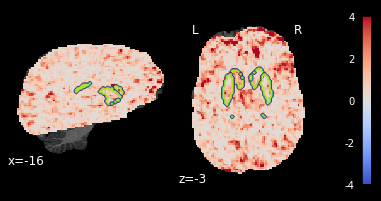

In [103]:
plotT(t_tmp, bg_tmp, maskpath, masks, sub, TR, c, [-16, -3], 4, 'ME')

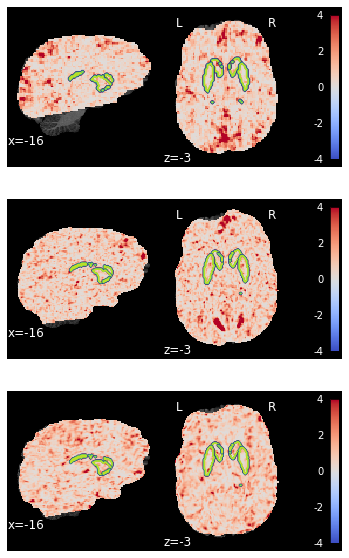

In [104]:
fe, (ax1, ax2, ax3) = plt.subplots(nrow, ncol, figsize=figsz)
plotT(t_tmp, bg_tmp, maskpath, masks, sub, '700', 3, [-16, -3], 4, "ME", axes=ax1)
plotT(t_tmp, bg_tmp, maskpath, masks, sub, '1510', 3, [-16, -3], 4, "CMRR", axes=ax2)
plotT(t_tmp, bg_tmp, maskpath, masks, sub, '1920', 3, [-16, -3], 4, "3D EPI", axes=ax3)

In [105]:
savename = '/scratch/qbi/uqkgarn1/STRIWP1/derivatives/glmTDFAST_TC/sub-%s_TC_nothrsh_latbycert.pdf' % '04'
fe.savefig(fname = savename, facecolor='w', edgecolor='w')

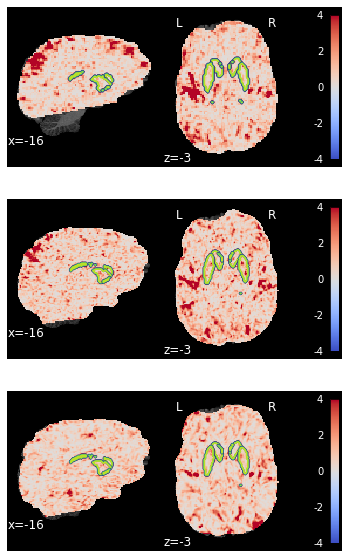

In [115]:
t_tmp = '/scratch/qbi/uqkgarn1/STRIWP1/derivatives/glmTDFAST_HANDS/sub-%s/TR%s/FLGLM/spmF_000%s.nii'
c = 1
ff, (ax1, ax2, ax3) = plt.subplots(nrow, ncol, figsize=figsz)
plotT(t_tmp, bg_tmp, maskpath, masks, sub, '700', c, [-16, -3], 4, "ME", axes=ax1)
plotT(t_tmp, bg_tmp, maskpath, masks, sub, '1510', c, [-16, -3], 4, "CMRR", axes=ax2)
plotT(t_tmp, bg_tmp, maskpath, masks, sub, '1920', c, [-16, -3], 4, "3D EPI", axes=ax3)

In [117]:
savename = '/scratch/qbi/uqkgarn1/STRIWP1/derivatives/glmTDFAST_HANDS/sub-%s_TC_nothrsh_hands.pdf' % '04'
ff.savefig(fname = savename, facecolor='w', edgecolor='w')

# plot example tSNR images

In [108]:
def plottSNR(t, bg, sub, TR, s, coords, maxval, disp, axes=None):
    stats = t % (sub, TR, s)
    T1 = bg % (sub, sub)
    disp = niplt.plot_stat_map(stat_map_img=stats, 
                               bg_img=T1, 
                               cut_coords=coords, 
                               colorbar=True, 
                               axes=axes,
                               annotate=True,
                               symmetric_cbar=True,
                               draw_cross=False,
                               black_bg=True,
                               vmax = maxval,
                               display_mode=disp,
                               cmap = "coolwarm") 
    return disp

In [109]:
t_tmp = '/scratch/qbi/uqkgarn1/STRIWP1/derivatives/tSNR/sub-%s/TR%s/SNR/_do-tsnr%s/tsnr.nii.gz'

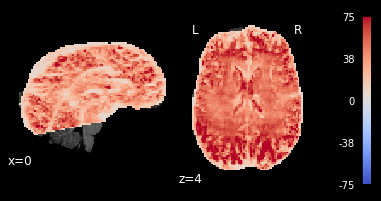

In [110]:
plottSNR(t_tmp, bg_tmp, '04', '700', '0', None, 75, 'xz')

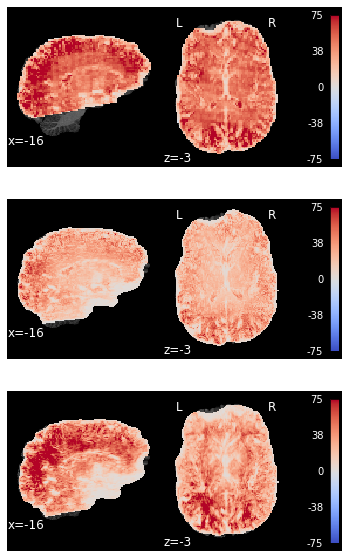

In [113]:
fg, (ax1, ax2, ax3) = plt.subplots(nrow, ncol, figsize=figsz)
plottSNR(t_tmp, bg_tmp, sub, '700', '0', [-16, -3], 75, "xz", axes=ax1)
plottSNR(t_tmp, bg_tmp, sub, '1510', '0', [-16, -3], 75, "xz", axes=ax2)
plottSNR(t_tmp, bg_tmp, sub, '1920', '0', [-16, -3], 75, "xz", axes=ax3)

In [114]:
savename = '/scratch/qbi/uqkgarn1/STRIWP1/derivatives/tSNR/sub-%s_tSNR.pdf' % '04'
fg.savefig(fname = savename, facecolor='w', edgecolor='w')